In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
from rpy2.robjects.packages import importr

utils = importr("utils")
utils.chooseCRANmirror(ind=1)
utils.install_packages('lme4')

%load_ext rpy2.ipython

R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/lme4_1.1-27.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 3311365 bytes (3.2 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to con

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [25]:
# Load data
conversations = pd.read_csv("results/contingency/conversations.csv")

# convert True/False to 0/1:
conversations.replace({False: 0, True: 1}, inplace=True)

conversations.head()


,utterance_id,speaker_code,transcript_raw,tokens,pos,start_time,end_time,age,corpus,transcript_file,...,follow_up_start_time,follow_up_is_speech_related,follow_up_is_intelligible,follow_up_is_contingent,follow_up_speech_act,response_latency,response_latency_follow_up,has_response,pos_feedback,caregiver_feedback_coherent
0,31,CHI,pillow .,"['pillow', '.']",['n'],45668.0,46783.0,18,Braunwald,/home/mitja/data/CHILDES/Braunwald/010510.cha,...,49198.0,NaN,0,0,YY,46.0,2415.0,1,0,0
1,56,CHI,on .,"['on', '.']",['adv'],85167.0,86154.0,18,Braunwald,/home/mitja/data/CHILDES/Braunwald/010510.cha,...,92985.0,1.0,1,0,YY,352.0,6831.0,1,0,1
2,61,CHI,on .,"['on', '.']",['adv'],92985.0,94007.0,18,Braunwald,/home/mitja/data/CHILDES/Braunwald/010510.cha,...,95853.0,1.0,1,0,YY,127.0,1846.0,1,0,1
3,72,CHI,crying .,"['crying', '.']",['part'],106808.0,108097.0,18,Braunwald,/home/mitja/data/CHILDES/Braunwald/010510.cha,...,111394.0,NaN,0,0,YY,-12.0,3297.0,1,0,0
4,75,CHI,xxx .,['.'],['none'],111394.0,112520.0,18,Braunwald,/home/mitja/data/CHILDES/Braunwald/010510.cha,...,114580.0,1.0,1,1,ST,93.0,2060.0,1,0,1


In [9]:
# Some children have very few data points:
counts = conversations.groupby("child_name").size()
counts

child_name
Braunwald_Laura                4479
Brent_Alexander                  99
Brent_Allen                       2
Brent_Brooklyn                    5
Brent_Dillon                    203
Brent_Henry                      41
Brent_Jacob_Abernathy             2
Brent_Jaylen                     32
Brent_Maggie                     75
Brent_Miranda                    57
Brent_Morgan                    243
Brent_Tabitha                   137
Brent_Tabitha_Sims                3
Brent_Timothy                   146
Brent_Tyrese                      5
Brent_Vas                         8
Brent_Vas_Coleman                63
Brent_Xavier                      4
MPI-EVA-Manchester_Eleanor    24067
MPI-EVA-Manchester_Fraser     56522
Thomas_Brian                    200
Thomas_Thomas                 58430
dtype: int64

In [10]:
# Exclude children with less than 100 datapoints:
# child_names_enough_data = [name for name, count in counts.items() if count > 100]
# print(len(conversations))
# conversations = conversations[conversations.child_name.isin(child_names_enough_data)]
# print(len(conversations))

## Caregiver Contingency
### By child

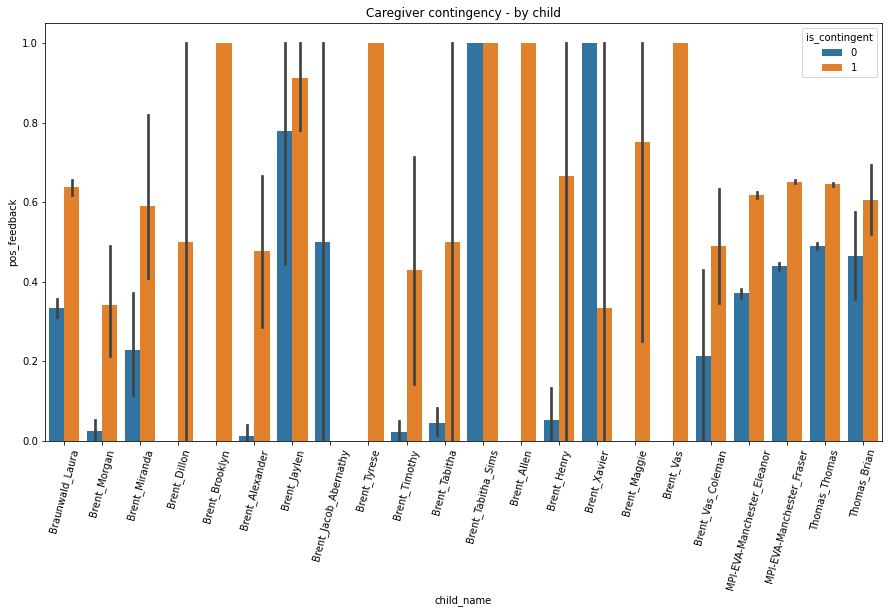

In [11]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.figure()
sns.barplot(
        data=conversations,
        x="child_name",
        y="pos_feedback",
        hue="is_contingent"
)
plt.title("Caregiver contingency - by child")
plt.xticks(rotation=75)
plt.subplots_adjust(bottom=0.3)

### By Age

Text(0.5, 1.0, 'Caregiver contingency - by age')

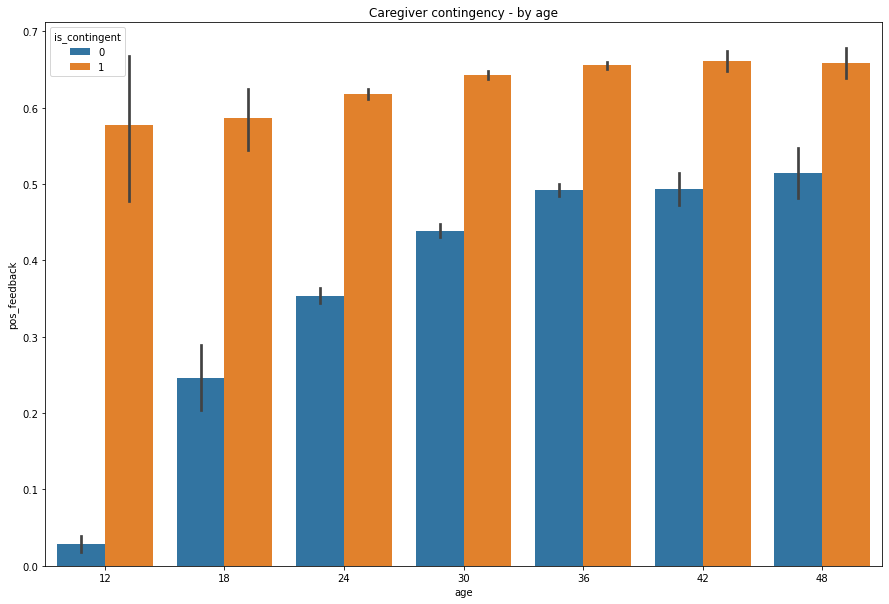

In [12]:
plt.rcParams['figure.figsize'] = [15, 10]
sns.barplot(
        data=conversations,
        x="age",
        y="pos_feedback",
        hue="is_contingent"
)
plt.title("Caregiver contingency - by age")

## Child contingency
### By Child


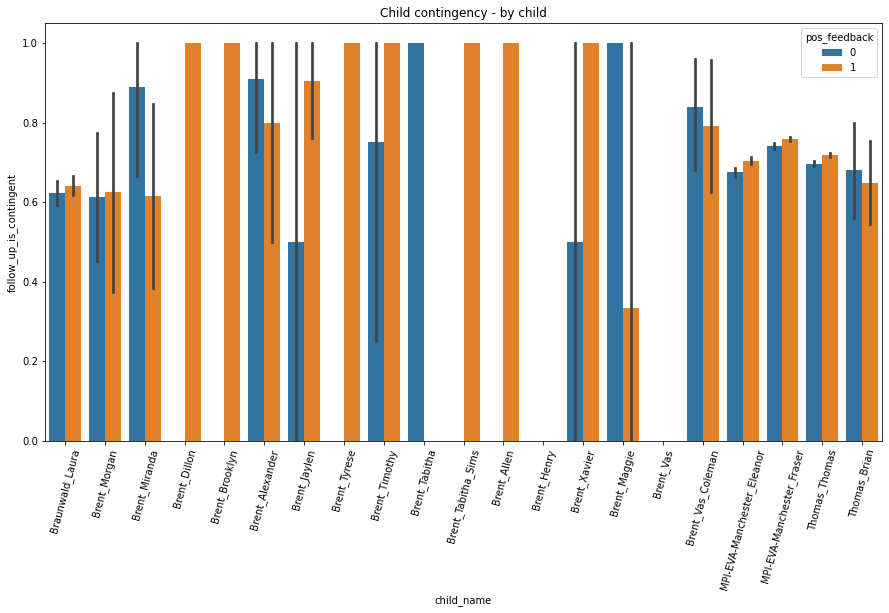

In [13]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.figure()
sns.barplot(
        data=conversations[conversations["is_contingent"] == 1],
        x="child_name",
        y="follow_up_is_contingent",
        hue="pos_feedback"
)
plt.title("Child contingency - by child")
plt.xticks(rotation=75)
plt.subplots_adjust(bottom=0.3)

### By Age

Text(0.5, 1.0, 'Child contingency - by age')

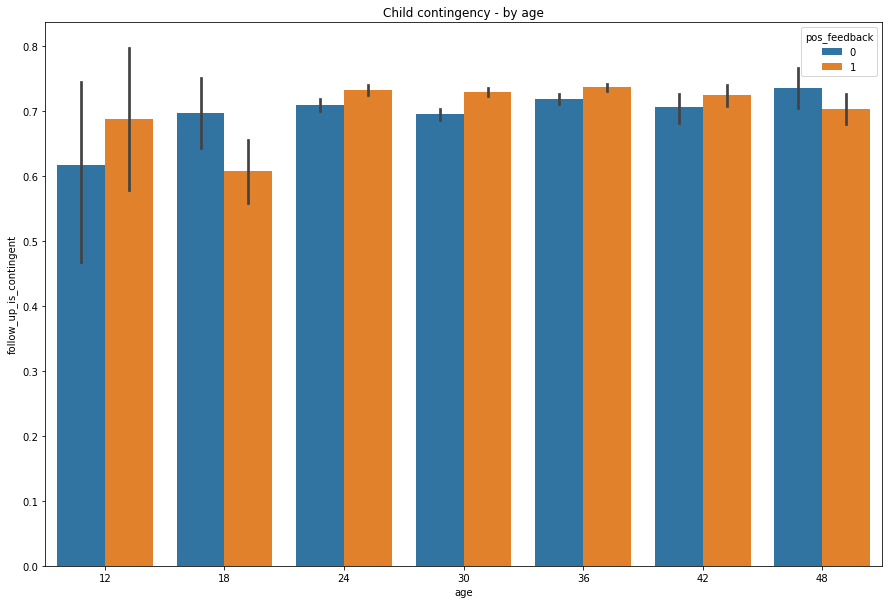

In [14]:
plt.rcParams['figure.figsize'] = [15, 10]
sns.barplot(
        data=conversations[conversations["is_contingent"] == 1],
        x="age",
        y="follow_up_is_contingent",
        hue="pos_feedback"
)
plt.title("Child contingency - by age")

## Caregiver contingency
### GLM (with mixed effects)

In [20]:
# normalize age
min_age, max_age = conversations["age"].min(), conversations["age"].max()
conversations["age_normalized"] = (conversations["age"] - min_age) / (max_age - min_age) * (1 - 0)


In [16]:
%%R -i conversations
library(lme4)

# Caregiver contingency
m_caregiver_contingency<-glmer('pos_feedback ~ is_contingent * age_normalized + (1 | child_name)', data=conversations, family=binomial) #, control=glmerControl(optimizer="bobyqa",optCtrl=list(maxfun=2e5)))
print(summary(m_caregiver_contingency))


R[write to console]: Loading required package: Matrix



Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: pos_feedback ~ is_contingent * age + (1 | child_name)
   Data: utterances

     AIC      BIC   logLik deviance df.resid 
189960.4 190009.8 -94975.2 189950.4   144818 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9994 -1.2007  0.7164  0.7571  4.7909 

Random effects:
 Groups     Name        Variance Std.Dev.
 child_name (Intercept) 1.8      1.341   
Number of obs: 144823, groups:  child_name, 22

Fixed effects:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -1.44873    0.17613  -8.226   <2e-16 ***
is_contingent      1.38527    0.03801  36.445   <2e-16 ***
age                1.36439    0.05726  23.830   <2e-16 ***
is_contingent:age -1.03259    0.06532 -15.809   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) is_cnt age   
is_contng

## Child Contingency
### GLM
#### Positive Case

In [17]:
%%R -i conversations
library(lme4)

conversations_child_contingent = subset(conversations, is_contingent==1)

# Child contingency
m_child_contingency<-glmer('follow_up_is_contingent ~ pos_feedback * age_normalized + (1 | child_name)', data=conversations_child_contingent, family=binomial)
print(summary(m_child_contingency))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: follow_up_is_contingent ~ pos_feedback * age + (1 | child_name)
   Data: utterances_child_intelligible

     AIC      BIC   logLik deviance df.resid 
122220.2 122268.0 -61105.1 122210.2   104001 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.7959 -1.4705  0.5829  0.6299  0.8125 

Random effects:
 Groups     Name        Variance Std.Dev.
 child_name (Intercept) 0.05276  0.2297  
Number of obs: 104006, groups:  child_name, 21

Fixed effects:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)       0.70106    0.09934   7.057  1.7e-12 ***
pos_feedback      0.17530    0.04903   3.575  0.00035 ***
age               0.24439    0.06942   3.521  0.00043 ***
pos_feedback:age -0.12547    0.08538  -1.470  0.14169    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)